Summary Statistics:
                       mean    median           std  skewness  kurtosis
CreditScore     650.528800    652.00     96.653299 -0.071596 -0.426113
Balance       76485.889288  97198.54  62397.405202 -0.141088 -1.489267
Point Earned    606.515100    605.00    225.924839  0.008343 -1.193784


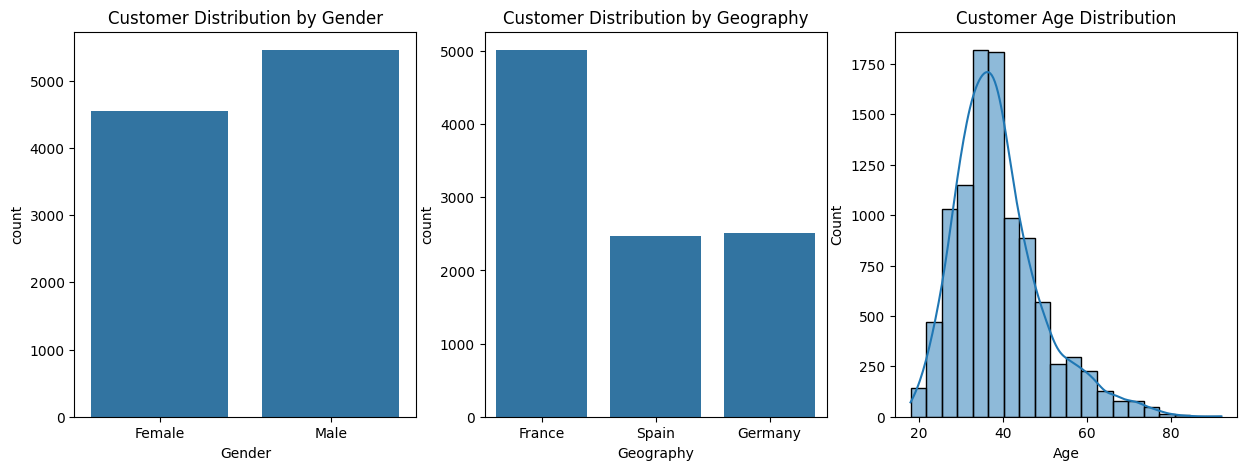

Transaction Count Stats (Active vs. Inactive):
 {'Active': {'min': 119, 'max': 1000, 'mean': 607.0440844009042}, 'Inactive': {'min': 163, 'max': 1000, 'mean': 604.4484789008832}}


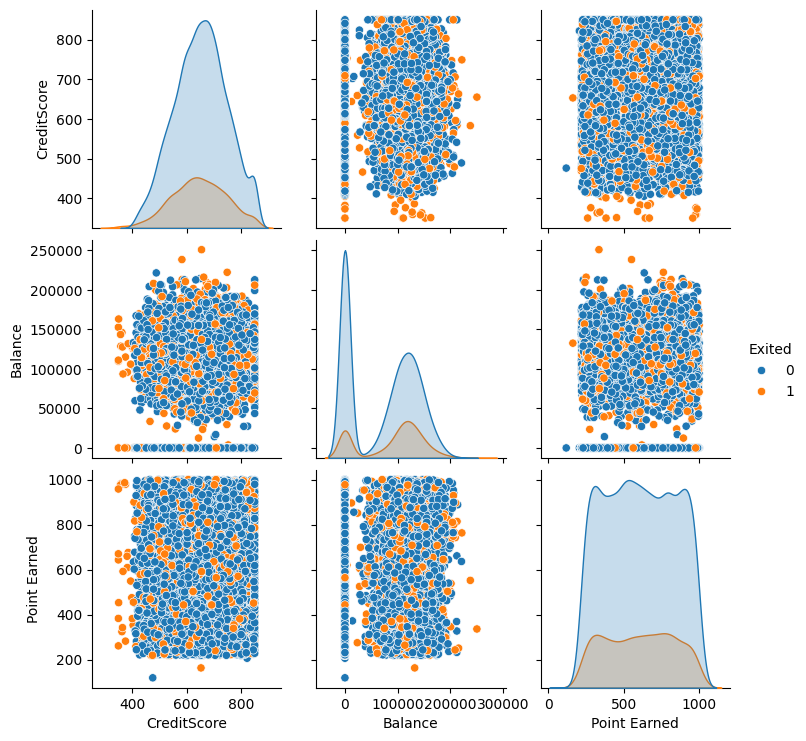

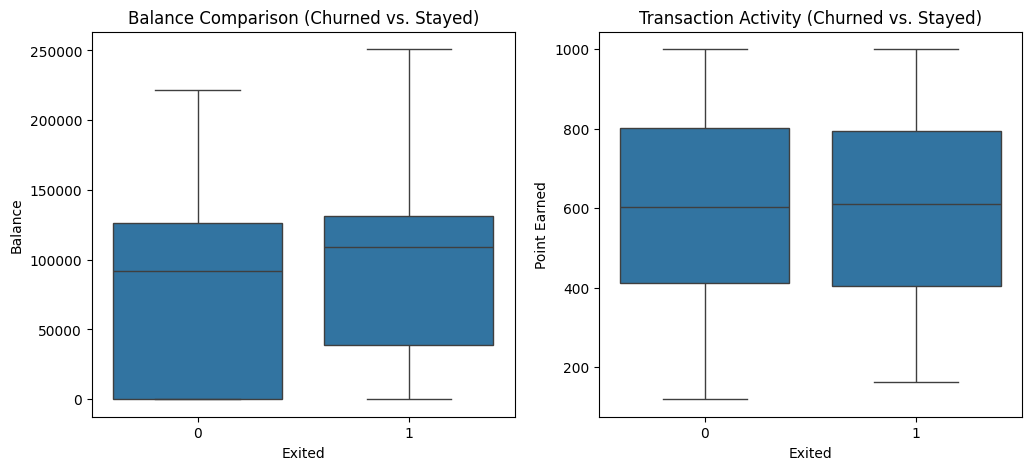

Probability of Low Credit Score & High Balance: 0.0638


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Load the dataset
file_path = "/content/Bank-Customer-Attrition-Insights-Data.csv"
df = pd.read_csv(file_path)

# Summary statistics for Balance, CreditScore, and Transaction Count
num_vars = ['CreditScore', 'Balance', 'Point Earned']
summary_stats = df[num_vars].agg(['mean', 'median', 'std']).T
summary_stats['skewness'] = df[num_vars].apply(skew)
summary_stats['kurtosis'] = df[num_vars].apply(kurtosis)
print("Summary Statistics:\n", summary_stats)

# Distribution of customers by Gender, Geography, and Age
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='Gender', data=df)
plt.title("Customer Distribution by Gender")

plt.subplot(1, 3, 2)
sns.countplot(x='Geography', data=df)
plt.title("Customer Distribution by Geography")

plt.subplot(1, 3, 3)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Customer Age Distribution")
plt.show()

# Transaction count for active vs inactive customers
active_customers = df[df['Exited'] == 0]['Point Earned']
inactive_customers = df[df['Exited'] == 1]['Point Earned']

transaction_stats = {
    "Active": {"min": active_customers.min(), "max": active_customers.max(), "mean": active_customers.mean()},
    "Inactive": {"min": inactive_customers.min(), "max": inactive_customers.max(), "mean": inactive_customers.mean()}
}
print("Transaction Count Stats (Active vs. Inactive):\n", transaction_stats)

# Relationship between Credit Score, Balance, and Transaction Count
sns.pairplot(df, vars=['CreditScore', 'Balance', 'Point Earned'], hue='Exited')
plt.show()

# Differences in Balance & Transaction Activity (Churned vs Stayed)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title("Balance Comparison (Churned vs. Stayed)")

plt.subplot(1, 2, 2)
sns.boxplot(x='Exited', y='Point Earned', data=df)
plt.title("Transaction Activity (Churned vs. Stayed)")
plt.show()

# Probability of Low Credit Score & High Balance
low_credit_threshold = df['CreditScore'].quantile(0.25)
high_balance_threshold = df['Balance'].quantile(0.75)

low_credit_high_balance = df[(df['CreditScore'] <= low_credit_threshold) & (df['Balance'] >= high_balance_threshold)]
probability = len(low_credit_high_balance) / len(df)
print(f"Probability of Low Credit Score & High Balance: {probability:.4f}")
